# Week 2
## Part 2: A little visualization exercise

In [1]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np

# Read data from file 'filename.tsv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data1 = pd.read_csv("./data1.tsv", sep = '\t', names=["x","y"]) #tab delimiters for .tsv file 
data2 = pd.read_csv("./data2.tsv", sep = '\t', names=["x","y"])
data3 = pd.read_csv("./data3.tsv", sep = '\t', names=["x","y"])
data4 = pd.read_csv("./data4.tsv", sep = '\t', names=["x","y"])
#Crimedata = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv") 

# Preview the first 5 lines of the loaded data 
data1.head()

,x,y
0,10,8.04
1,8,6.95
2,13,7.58
3,9,8.81
4,11,8.33


In [2]:
#Using the numpy function mean, calculate the mean of both x-values and y-values for each dataset.
#Use python string formatting to print precisely two decimal places of these results to the output cell. 

datasets=[data1, data2, data3, data4]
for num, i in enumerate(datasets):
    print("Mean values data{}:\n x {:10.2f} \n y {:10.2f}".format(num+1,i["x"].mean(),i["y"].mean()))

Mean values data1:
 x       9.00 
 y       7.50
Mean values data2:
 x       9.00 
 y       7.50
Mean values data3:
 x       9.00 
 y       7.50
Mean values data4:
 x       9.00 
 y       7.50


In [3]:
#Now calculate the variance for all of the various sets of x- and y-values (to three decimal places).

datasets=[data1, data2, data3, data4]
for num, i in enumerate(datasets):
    print("Variance values data{}:\n x {:10.3f} \n y {:10.3f}".format(num+1,i["x"].var(),i["y"].var()))

Variance values data1:
 x     11.000 
 y      4.127
Variance values data2:
 x     11.000 
 y      4.128
Variance values data3:
 x     11.000 
 y      4.123
Variance values data4:
 x     11.000 
 y      4.123


In [4]:
#Use numpy to calculate the Pearson correlation between x- and y-values for all four data sets (also to three decimal places)
import numpy as np
datasets=[data1, data2, data3, data4]
for num, i in enumerate(datasets):
    print("Pearson corrrelation between x and y values for data{}:\n {:10.3f}".format(num+1,np.corrcoef(i["x"],i["y"])[0,1]))

Pearson corrrelation between x and y values for data1:
      0.816
Pearson corrrelation between x and y values for data2:
      0.816
Pearson corrrelation between x and y values for data3:
      0.816
Pearson corrrelation between x and y values for data4:
      0.817


In [5]:
#The next step is use linear regression to fit a straight line f(x)=ax+b through each dataset and report a and b (to two decimal places)

from scipy import stats
datasets=[data1, data2, data3, data4]
for num, i in enumerate(datasets):
    slope, intercept, r_value, p_value, std_err = stats.linregress(i["x"],i["y"])
    print("Slope and intercept for data{}:\n a {:10.2f}\n b {:10.2f}".format(num+1,slope,intercept))

Slope and intercept for data1:
 a       0.50
 b       3.00
Slope and intercept for data2:
 a       0.50
 b       3.00
Slope and intercept for data3:
 a       0.50
 b       3.00
Slope and intercept for data4:
 a       0.50
 b       3.00


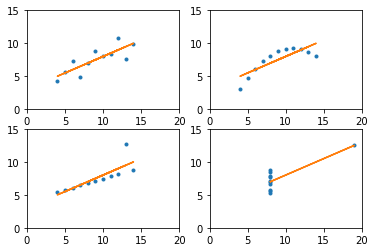

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit



# Fit with polyfit
datasets=[data1, data2, data3, data4]
for num, i in enumerate(datasets):
    plt.subplot(2, 2, num+1) #subplot(nrows, ncols, index, **kwargs)
    plt.axis([0, 20, 0, 15])
    plt.plot(i["x"], i["y"], '.')
    b, m = polyfit(i["x"], i["y"], 1)
    plt.plot(i["x"], b + m * i["x"], '-')
    

plt.show()

## Part 3: Working with the dataset

In [7]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib.pyplot as plt

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
crimedata = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv") 

# Preview the first 5 lines of the loaded data 
crimedata.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,07/02/2004,13:43,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020


**Temporal Patterns**

In [8]:
#Focusing on a set of crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

#Transforming the variable into datetime type
crimedata['Date'] = pd.to_datetime(crimedata['Date'])
crimedata['Time'] = pd.to_datetime(crimedata['Time'], format='%H:%M')
data = crimedata[crimedata['Category'].isin(focuscrimes)]

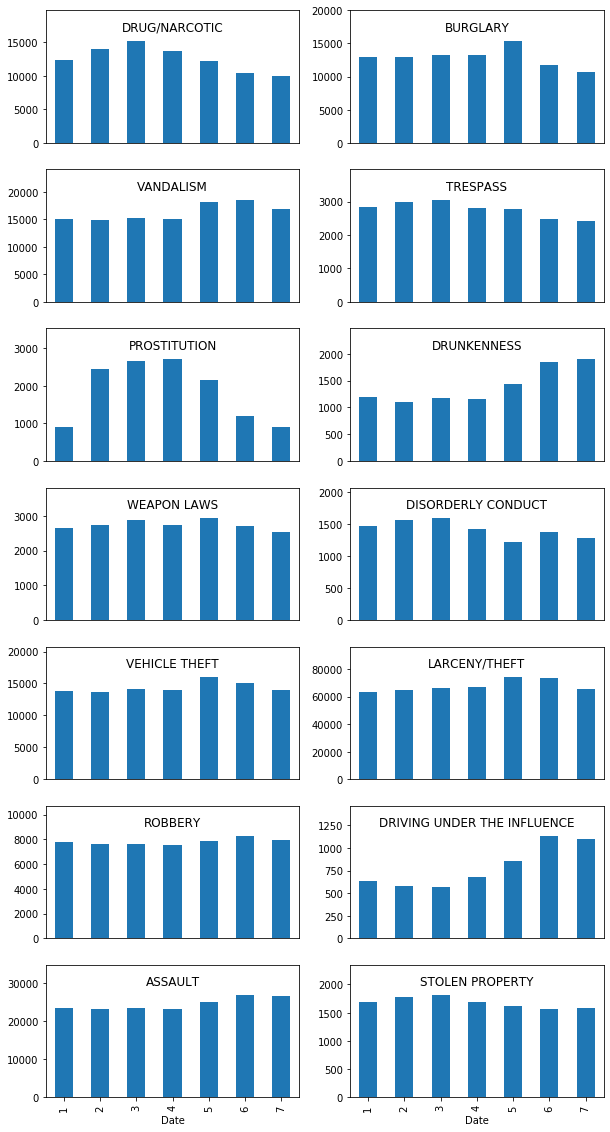

In [9]:
#Weekly patterns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
df = data
for i, crime in enumerate(focuscrimes):
    axi=axes[i%7,i%2]
    if i%7 !=6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.30)
    df[df['Category'] == crime][['IncidntNum']].groupby(df.Date.dt.weekday + 1).nunique().plot(ax=axi, kind='bar', legend=None)
    #plt.show()


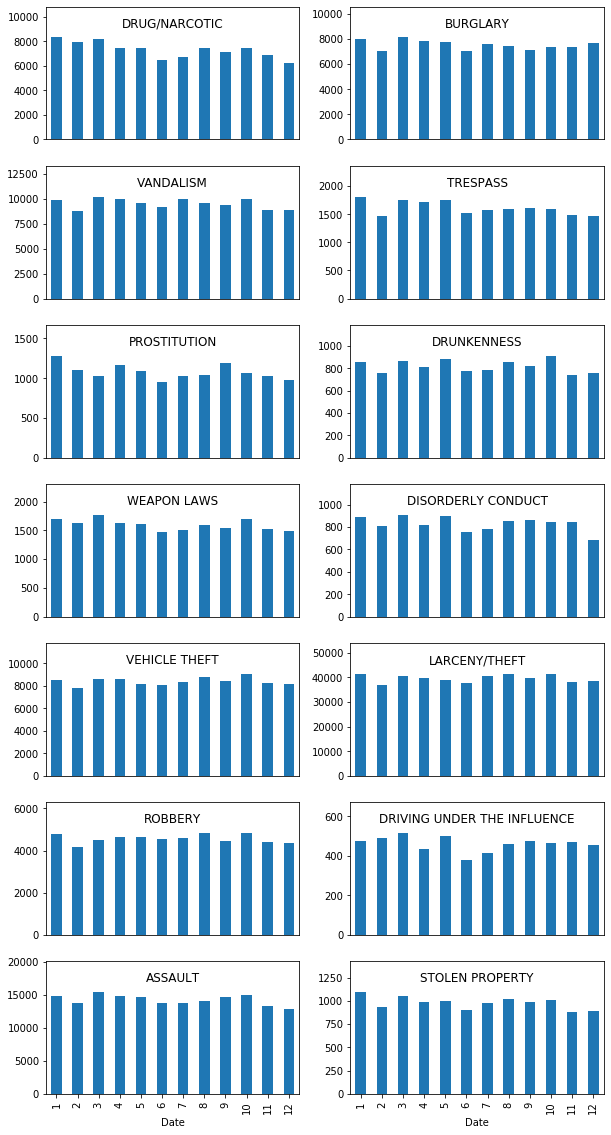

In [10]:
#Monthly patterns

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
df = data

for i, crime in enumerate(focuscrimes):
    axi=axes[i%7,i%2]
    if i%7 !=6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.30)
    df[df['Category'] == crime][['IncidntNum']].groupby(df.Date.dt.month).nunique().plot(ax=axi, kind='bar', legend=None)
    #plt.show()

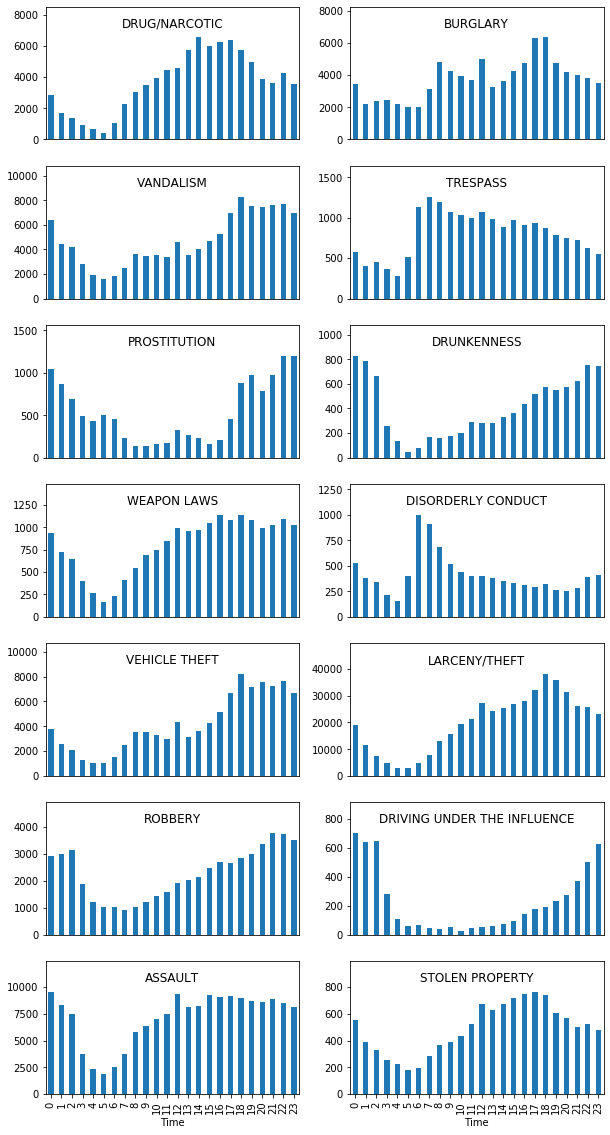

In [11]:
#Hourly patterns
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
df = data

for i, crime in enumerate(focuscrimes):
    axi=axes[i%7,i%2]
    if i%7 !=6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.30)
    df[df['Category'] == crime][['IncidntNum']].groupby(df.Time.dt.hour).nunique().plot(ax=axi, kind='bar', legend=None)
    #plt.show()

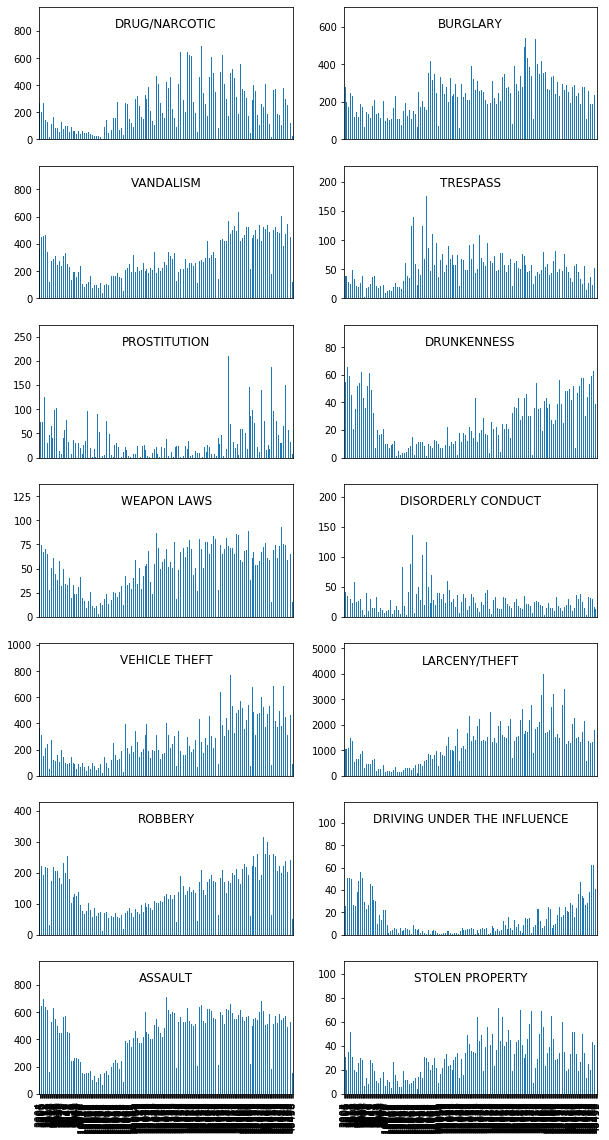

In [12]:
#Hours of the week
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(10,20))
df = data

for i, crime in enumerate(focuscrimes):
    axi=axes[i%7,i%2]
    if i%7 !=6:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(crime, y=0.80)
    axi.margins(y=0.30)
    df[df['Category'] == crime][['IncidntNum']].groupby((df.Date.dt.year +1) * (df.Time.dt.hour +1)).nunique().plot(ax=axi, kind='bar', legend=None)
    #plt.show()

**Crime in San Francisco districts**

In [13]:
#First, simply list the names of SF's 10 police districts.
crimedata.PdDistrict.unique()

array(['SOUTHERN', 'TARAVAL', 'BAYVIEW', 'TENDERLOIN', 'NORTHERN',
       'INGLESIDE', 'RICHMOND', 'MISSION', 'CENTRAL', 'PARK', nan],
      dtype=object)

In [14]:
#Which has the most crimes? 
crimedata.PdDistrict.value_counts()

SOUTHERN      399785
MISSION       300076
NORTHERN      272713
CENTRAL       226255
BAYVIEW       221000
INGLESIDE     194180
TENDERLOIN    191746
TARAVAL       166971
PARK          125479
RICHMOND      116818
Name: PdDistrict, dtype: int64

In [15]:
#Which has the most focus crimes?
data = crimedata[crimedata['Category'].isin(focuscrimes)]
data.PdDistrict.value_counts()

SOUTHERN      231125
NORTHERN      175525
MISSION       167757
CENTRAL       142378
BAYVIEW       118026
TENDERLOIN    108085
INGLESIDE     107654
TARAVAL        92254
PARK           69397
RICHMOND       68452
Name: PdDistrict, dtype: int64

In [16]:
#I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical.
#First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole.
#That's simply a normalized version of this plot. Let's call it P(crime).

P_crime = data.Category.value_counts(normalize=True)

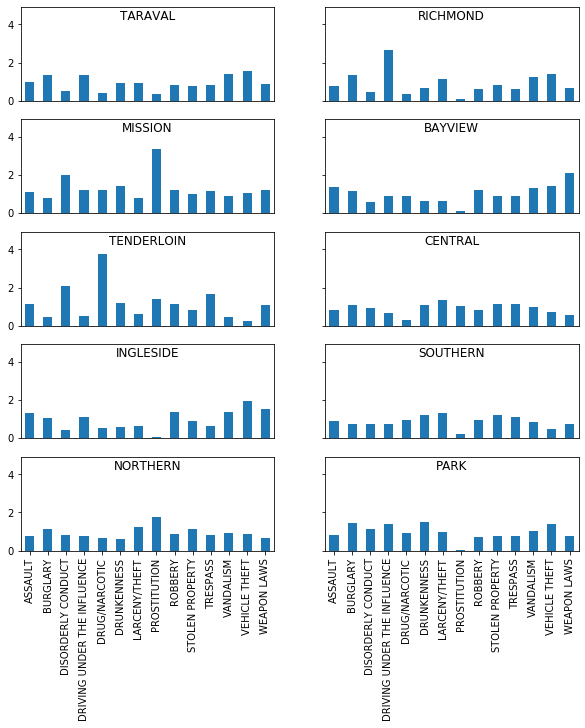

In [17]:
#P(crime|district)/P(crime)
#That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole.

fig, axes = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(10,10))
df = data
districts = data.PdDistrict.unique()
districts = districts[~pd.isnull(districts)]

for i, district in enumerate(districts):
    axi=axes[i%5,i%2]
    if i%5 !=4:
        axi.axes.get_xaxis().set_visible(False)
    axi.set_title(district, y=0.80)
    axi.margins(y=0.30)
    (df[df['PdDistrict'] == district].Category.value_counts(normalize=True)/P_crime).plot(ax=axi, kind='bar', legend=None)

## Part 4: Visualizing Geo-data

### Exploring the data

A vector map is a group of several files, with name.shp being the main one, where the geographic features are saved. Important that all other files as 'name.shx', ' name.dbf', etc., must be at same folder.

Let's explore the data:

In [18]:
import shapefile as shp
shp_path = 'san.shp'
sf = shp.Reader(shp_path)

In [19]:
len(sf.shapes()) #This means that exist 10 shapes in our shape file

10

In [20]:
for i in range(0,len(sf.shapes())):
    print(sf.records()[i])

Record #0: [1, 'CENTRAL', 'A']
Record #1: [2, 'SOUTHERN', 'B']
Record #2: [3, 'BAYVIEW', 'C']
Record #3: [4, 'MISSION', 'D']
Record #4: [5, 'PARK', 'F']
Record #5: [6, 'RICHMOND', 'G']
Record #6: [7, 'INGLESIDE', 'H']
Record #7: [8, 'TARAVAL', 'I']
Record #8: [9, 'NORTHERN', 'E']
Record #9: [10, 'TENDERLOIN', 'J']


In [21]:
#Just to look at the data, let's create a usefull function to convert our 'shapefile' format on a more commun Pandas dataframe format:

def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [22]:
#So, let's convert sf data on a dataframe and see how it looks like
df = read_shapefile(sf)
df.shape #The dataframe has shape of (10,4), where 4 means the three variable seen above and the coordinates

(10, 4)

In [23]:
df.head() #coords contains the latitude and longitude of every point that was used to create a specific map shape

,OBJECTID,DISTRICT,COMPANY,coords
0,1,CENTRAL,A,"[(-122.40532134644249, 37.806867516866724), (-..."
1,2,SOUTHERN,B,"[(-122.38821894111335, 37.78999576746098), (-1..."
2,3,BAYVIEW,C,"[(-122.39341605532405, 37.708411637816816), (-..."
3,4,MISSION,D,"[(-122.40801677575325, 37.76940485786585), (-1..."
4,5,PARK,F,"[(-122.44665042193688, 37.77587626927481), (-1..."


### Plotting one shape at a time

Now we can print the shapes.

The below function does two things: 
* plots the shape (polygon) based on the comuna's coordinates
* calculates and returns the medium point of that specific shape (x0, y0). This medium point was also used to define where to print the comuna's name.

In [24]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

(-122.41378829382472, 37.80472203449138)

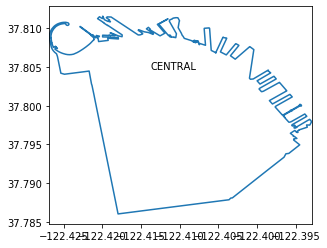

In [25]:
comuna = 'CENTRAL'
com_id = df[df.DISTRICT == comuna].index.get_values()[0]
plot_shape(com_id, comuna)

### Plotting all the shapes
Now, we must plot at same picture, all the shapes that are on our dataframe. 
For that, we will use the following function:

In [26]:
#The above function, by default, plot all shapes on a given 'df' file, including its shape id at middle of it. 
#Or a zoomed map will be plotted (w/o ids). You can change the function to print or not the ids.

def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

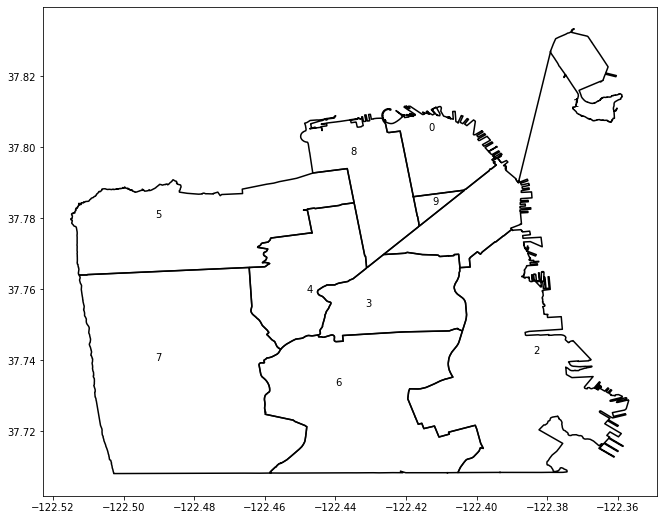

In [27]:
plot_map(sf)

### Plotting a single shape over a complete map
We can "merge" the two previous functions and "plot" a single shape inside a full map. For that, let's write a new function, where the shape id is now an input parameter.

In [28]:
def plot_map2(id, sf, x_lim = None, y_lim = None, figsize=(11,9)):
    '''
    Plot map with lim coordinates
    '''
   
    plt.figure(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat, 'r', linewidth=3) 
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

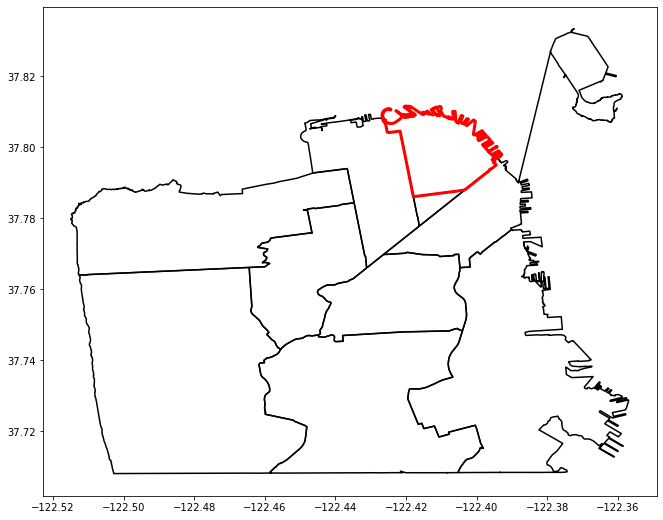

In [29]:
#Plotting the CENTRAL district (id 0) in red
plot_map2(0, sf)#, x_lim, y_lim)

We can also define a function to "fill" a single shape with a specific color.

In [30]:
def plot_map_fill(id, sf, x_lim = None, 
                          y_lim = None, 
                          figsize = (11,9), 
                          color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
        
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    ax.fill(x_lon,y_lat, color)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

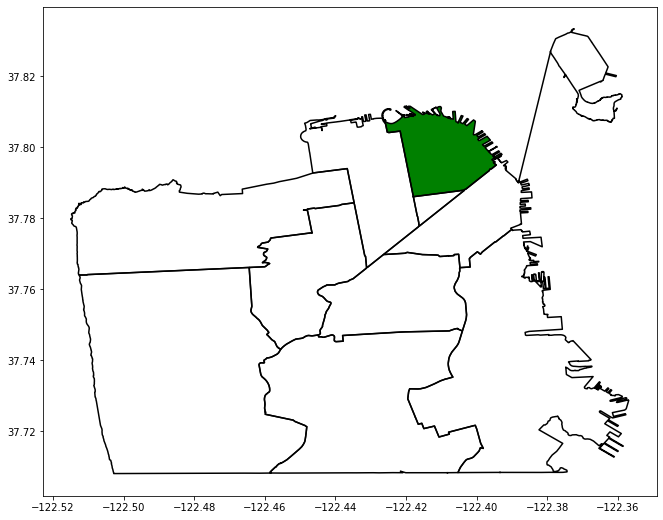

In [31]:
plot_map_fill(0, sf, color='g')#x_lim, y_lim, 

### Plotting multiple shapes on a full map

We can also define a function to create a map where several shapes are selected.

In [32]:
def plot_map_fill_multiples_ids(title, comuna, sf, 
                                               x_lim = None, 
                                               y_lim = None, 
                                               figsize = (11,9), 
                                               color = 'r'):
    '''
    Plot map with lim coordinates
    '''
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
            
    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color)
             
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=10)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

<Figure size 792x648 with 0 Axes>

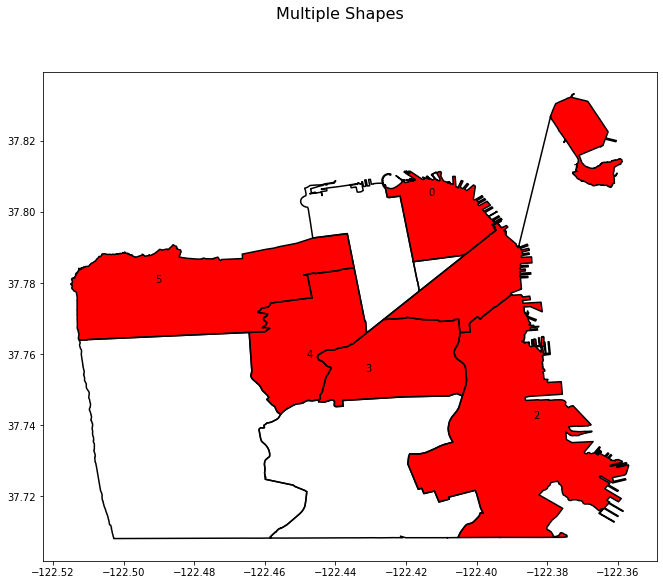

In [33]:
comuna_id = [0, 1, 2, 3, 4, 5]
plot_map_fill_multiples_ids("Multiple Shapes", 
                            comuna_id, sf, color = 'r')

In [34]:
def plot_comunas_2(sf, title, comunas, color):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        comuna_id.append(df[df.DISTRICT == i.upper()]
                         .index.get_values()[0])
    plot_map_fill_multiples_ids(title, comuna_id, sf, 
                                       x_lim = None, 
                                       y_lim = None, 
                                       figsize = (11,9), 
                                       color = color);

<Figure size 792x648 with 0 Axes>

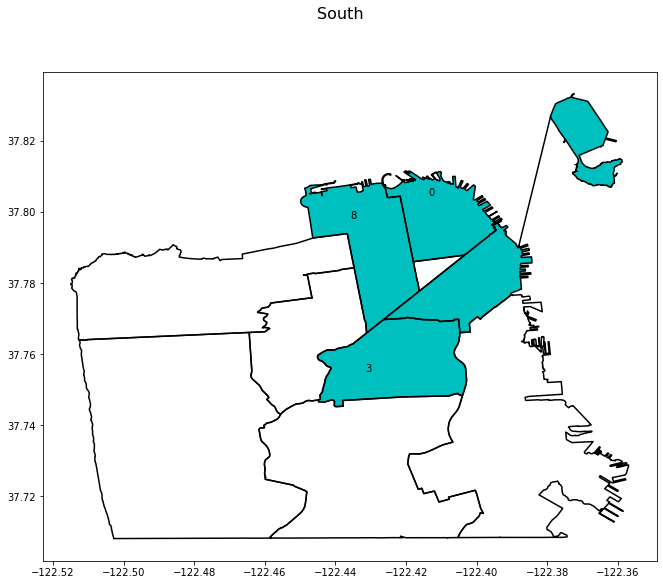

In [35]:
districts = ['CENTRAL', 'MISSION', 'SOUTHERN', 'NORTHERN']
plot_comunas_2(sf, 'South', districts, 'c')

### Creating 'Heat Maps'
A very useful type of map is to fill a specific shape with a color, which "intensity" is proportional to a given value.

First we will create a function that once receiving a list of data, will split them on "bins". For each one of those beans will get a specific color assigned. For experience, usually 5 to 7 bins are good to have a good feeling of data distribution. We will use 6 bins and 4 different color palettes associated with those bins. You must select one of those bins at time.

In [36]:
def calc_color(data, color=None):
        if color   == 1:
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0', '#807dbaF0','#6a51a3F0','#54278fF0'];
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4',
                        '#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3:
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd',
                        '#969696','#636363','#252525'];
            colors = 'Greys';
        elif color == 9:
            color_sq = ['#ff0000','#ff0000','#ff0000',
                        '#ff0000','#ff0000','#ff0000'];
        else:
            color_sq = ['#ffffd4','#fee391','#fec44f',
                        '#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data, 6, retbins=True, 
        labels=list(range(6)))
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1), end =" ")
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;
    
    

def plot_comunas_data(sf, title, comunas, data=None, 
                      color=None, print_id=False):
    '''
    Plot map with selected comunes, using specific color
    '''
    
    color_ton, bins = calc_color(data, color)
    df = read_shapefile(sf)
    comuna_id = []
    for i in comunas:
        #i = conv_comuna(i).upper()
        comuna_id.append(df[df.DISTRICT == 
                            i.upper()].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, comuna_id, 
                                     print_id, 
                                     color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9));
     
    
    
def plot_map_fill_multiples_ids_tone(sf, title, comuna,  
                                     print_id, color_ton, 
                                     bins, 
                                     x_lim = None, 
                                     y_lim = None, 
                                     figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
        
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
            x = [i[0] for i in shape.shape.points[:]]
            y = [i[1] for i in shape.shape.points[:]]
            ax.plot(x, y, 'k')

    for id in comuna:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[comuna.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        


1: 100 => 149 
2: 150 => 199 
3: 200 => 249 
4: 250 => 299 
5: 300 => 349 
6: 350 => 399 

   1   2   3   4   5   6


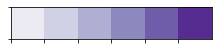

<Figure size 792x648 with 0 Axes>

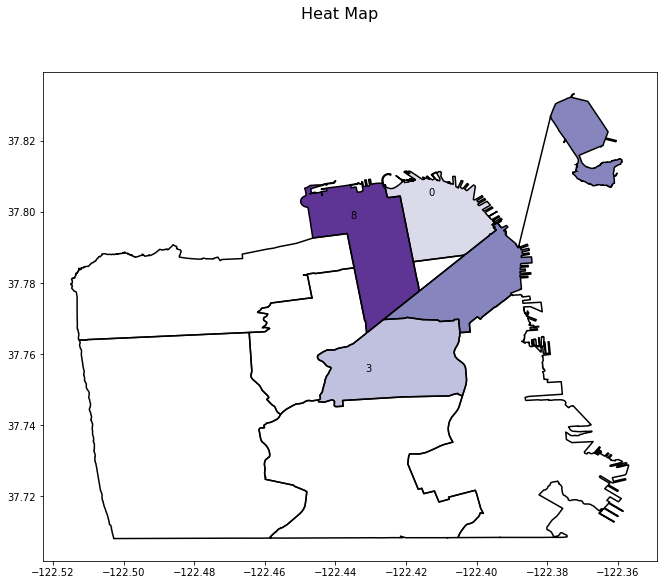

In [45]:
districts = ['CENTRAL', 'MISSION', 'SOUTHERN', 'NORTHERN']
data = [100, 200, 300, 400]
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'Heat Map', districts, data, color_pallete, print_id)

### Determine the districts where you should (and should not) leave your car on Sundays.

In [38]:
crimedata.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,2014-09-23,1900-01-01 01:00:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000
1,150045675,ASSAULT,BATTERY,Thursday,2015-01-15,1900-01-01 17:00:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,2014-07-30,1900-01-01 09:32:00,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085
3,150383259,ASSAULT,BATTERY,Saturday,2015-05-02,1900-01-01 23:10:00,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134
4,40753980,OTHER OFFENSES,RECKLESS DRIVING,Friday,2004-07-02,1900-01-01 13:43:00,BAYVIEW,NONE,I-280 / CESAR CHAVEZ ST,-120.500000,90.000000,POINT (-120.5 90),4075398065020


In [39]:
cartheftdataSunday = crimedata[crimedata['Category'] == 'VEHICLE THEFT'][crimedata['DayOfWeek'] == 'Sunday']
cartheftdataSunday.head()

C:\Users\alpt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
147,150108596,VEHICLE THEFT,STOLEN MOTORCYCLE,Sunday,2015-01-25,1900-01-01 17:00:00,BAYVIEW,NONE,700 Block of JERROLD AV,-122.373376,37.729769,POINT (-122.37337604924 37.7297692117678),15010859607023
148,150105893,VEHICLE THEFT,STOLEN MOTORCYCLE,Sunday,2015-02-01,1900-01-01 23:00:00,INGLESIDE,NONE,700 Block of MOULTRIE ST,-122.416188,37.735439,POINT (-122.416187526379 37.7354387951327),15010589307023
269,150100990,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2015-02-01,1900-01-01 18:00:00,TARAVAL,NONE,FUNSTON AV / NORIEGA ST,-122.470008,37.755402,POINT (-122.47000800007 37.7554018489917),15010099007021
428,150100570,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2015-02-01,1900-01-01 00:05:00,PARK,NONE,BAKER ST / FELL ST,-122.440924,37.773635,POINT (-122.440923876434 37.7736351065468),15010057007021
432,150099230,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,2015-02-01,1900-01-01 18:00:00,CENTRAL,NONE,500 Block of COLUMBUS AV,-122.409576,37.799952,POINT (-122.409576373262 37.7999519603954),15009923007021


In [40]:
groupedcarthefts = cartheftdataSunday.groupby(crimedata['PdDistrict']).count()
groupedcarthefts.IncidntNum
groupedcarthefts.index

Index(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'],
      dtype='object', name='PdDistrict')


1: 357 => 1347 
2: 1348 => 1505 
3: 1506 => 1760 
4: 1761 => 2005 
5: 2006 => 2374 
6: 2375 => 2854 

   1   2   3   4   5   6


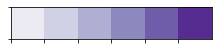

<Figure size 792x648 with 0 Axes>

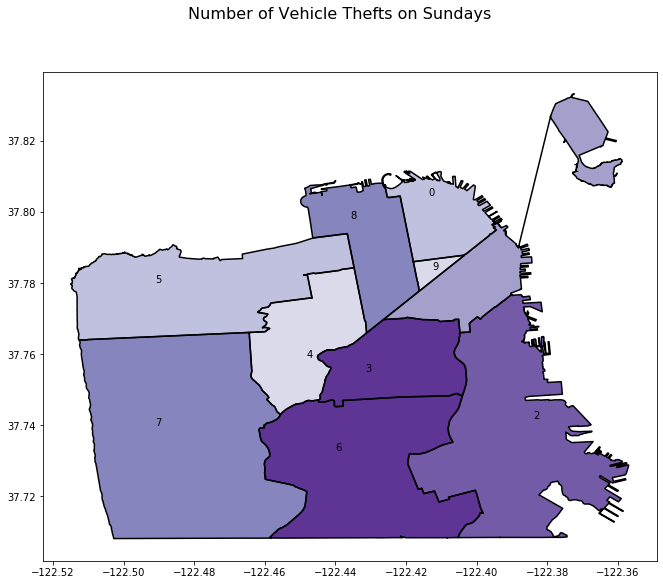

In [41]:
districts = groupedcarthefts.index
data = groupedcarthefts.IncidntNum
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'Number of Vehicle Thefts on Sundays', districts, data, color_pallete, print_id)

**Where should you park the car for it to be safest? And where's the worst place?**

The number of vehicle thefts is higher in district 3 and 6, while district 4 and 9 have the lowest number of vehicle thefts. However, in order to decide where to park the car, I would divide the number of thefts by the size of the district. Indeed, it is likely that, in a bigger district, there are more cars, so a higher number of thefts is acceptable. 
For this reason, I would feel safer to park in district 4 than in district 9, which is very small so can reasonably contain fewer cars (but still has a similar number of thefts).

C:\Users\alpt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.



1: 327 => 1360 
2: 1361 => 1660 
3: 1661 => 1985 
4: 1986 => 2278 
5: 2279 => 2516 
6: 2517 => 2932 

   1   2   3   4   5   6


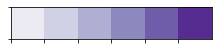

<Figure size 792x648 with 0 Axes>

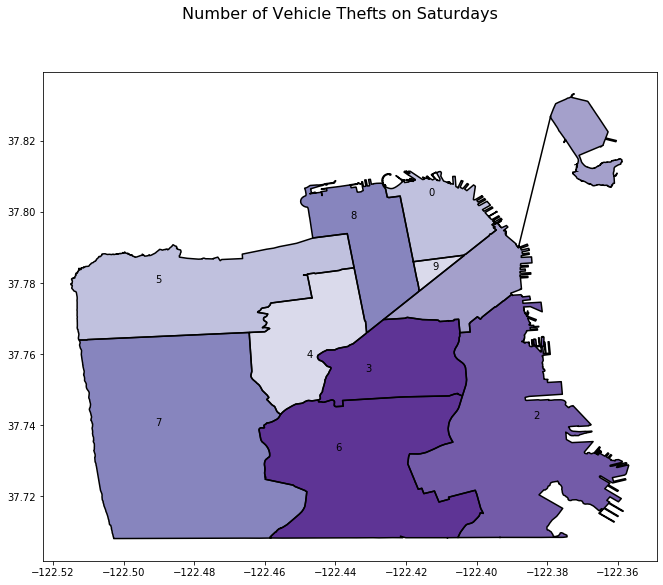

In [42]:
cartheftdataSaturday = crimedata[crimedata['Category'] == 'VEHICLE THEFT'][crimedata['DayOfWeek'] == 'Saturday']

groupedcarthefts = cartheftdataSaturday.groupby(crimedata['PdDistrict']).count()
groupedcarthefts.IncidntNum
groupedcarthefts.index

districts = groupedcarthefts.index
data = groupedcarthefts.IncidntNum
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'Number of Vehicle Thefts on Saturdays', districts, data, color_pallete, print_id)

C:\Users\alpt\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.



1: 309 => 1321 
2: 1322 => 1407 
3: 1408 => 1662 
4: 1663 => 1978 
5: 1979 => 2327 
6: 2328 => 2958 

   1   2   3   4   5   6


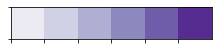

<Figure size 792x648 with 0 Axes>

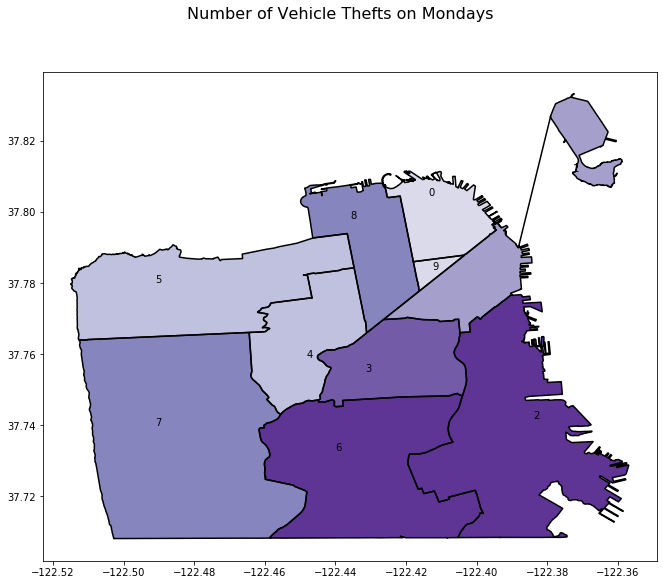

In [43]:
cartheftdataMonday = crimedata[crimedata['Category'] == 'VEHICLE THEFT'][crimedata['DayOfWeek'] == 'Monday']

groupedcarthefts = cartheftdataMonday.groupby(crimedata['PdDistrict']).count()
groupedcarthefts.IncidntNum
groupedcarthefts.index

districts = groupedcarthefts.index
data = groupedcarthefts.IncidntNum
print_id = True # The shape id will be printed
color_pallete = 1 # 'Purples'
plot_comunas_data(sf, 'Number of Vehicle Thefts on Mondays', districts, data, color_pallete, print_id)

**Create plots for the same crime type, but different days -> comment on the results**

Vehicle thefts seem to be similarly distributed in the different districts throught Saturday, Sunday and Monday.